In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Для этого задания я решил выбрать распределение **хи-квадрат с 2-мя степенями свободы**

In [3]:
chisq_rv = sts.chi2(df=2)
sample = chisq_rv.rvs(1000)

Нарисуем гистограмму, на этот же график наложим теоретическую плотность распределения

Text(0.5, 0, '$x$')

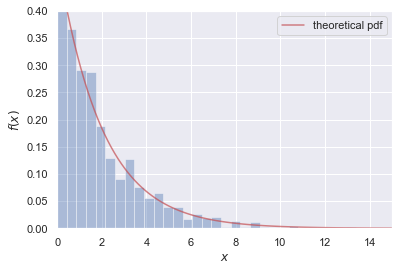

In [18]:
sns.distplot(sample, norm_hist=True, kde=False)
plt.ylabel('fraction of samples');
plt.xlabel('$x$');

x = np.linspace(0, 15, 100)
pdf = chisq_rv.pdf(x)
plt.plot(x, pdf, 'r', label='theoretical pdf', alpha=0.7);
plt.legend()
plt.xlim([0, 15])
plt.ylim([0, 0.4])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

То же самое, только вместо гистограммы отрисуем ядерную оценку плотности

Text(0.5, 8.95999999999998, '$x$')

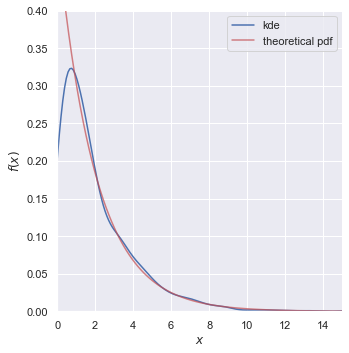

In [14]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = sns.displot(df['KDE'], kind='kde', label="kde")

x = np.linspace(0, 15, 100)
pdf = chisq_rv.pdf(x)
plt.plot(x, pdf, 'r', label='theoretical pdf', alpha=0.7);
plt.legend()
plt.xlim([0, 15])
plt.ylim([0, 0.4])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Сгенерируем 1000 выборок объема n = 30 (n можно поменять в любой момент)

In [30]:
samples = []
samples_means = []
n = 30
for i in range(0, 1000):
    samples.append(chisq_rv.rvs(n))
    
samples_means = [sample_.mean() for sample_ in samples]

Выборочное распределение средних 

<AxesSubplot:ylabel='Count'>

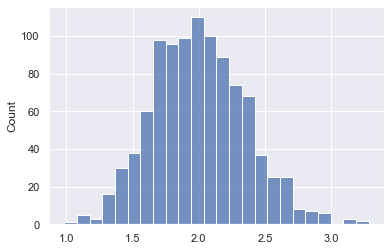

In [31]:
sns.histplot(samples_means)

Теоретические значения для среднего и дисперсии распределения хи-квадрат (E(x) = k, D(x) = 2k, k - число степеней свободы)

In [32]:
e = 2
var = 4

In [33]:
norm_approx_rv = sts.norm(e, np.sqrt(var/n))

Здесь красная линия описывает **нормальное распределение** с параметрами, приближающими распределение выборочных средних

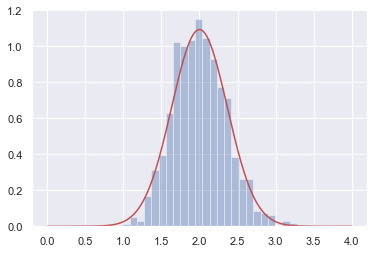

In [34]:
sns.set_theme()
x = np.linspace(0, 4, 1000)
weights_ = np.ones_like(samples_means) / len(samples_means) * 12
sns.distplot(samples_means, norm_hist=True, kde=False)

pdf_norm = norm_approx_rv.pdf(x)
plt.plot(x, pdf_norm, 'r', alpha=1);

Как мы можем увидеть, меняя значение параметра n в большую сторону (увеличивая размер каждой выборки), мы сглаживаем наше нормальное распределение, причем чем больше будет n, тем меньшей диспрерсией это распределение будет обладать 